<a href="https://colab.research.google.com/github/Alihassan7726/BERT-/blob/main/Quora_Insincere_Question_classification_using_BERT_%26_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align=center> Fine-Tune BERT for Text Classification with TensorFlow</h2>

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 1: BERT Classification Model</p>
</div>

### Contents

This project/notebook consists of several Tasks.

- **[Task 1]()**: Setting up TensorFlow and Colab Runtime
- **[Task 2]()**: Installing tensorflow and tensorflow model garden 
- **[Task 3]()**: Downloading and Import the Quora Insincere Questions Dataset
- **[Task 4]()**: Creating tf.data.Datasets for Training and Evaluation
- **[Task 5]()**: Downloading a Pre-trained BERT Model from TensorFlow Hub
- **[Task 6]()**: Tokenizing and Preprocess Text for BERT
- **[Task 7]()**: Wrapping a Python Function into a TensorFlow op for Eager Execution
- **[Task 8]()**: Creating a TensorFlow Input Pipeline with `tf.data`
- **[Task 9]()**: Adding a Classification Head to the BERT `hub.KerasLayer`
- **[Task 10]()**: Fine-Tuning BERT for Text Classification
- **[Task 11]()**: Evaluating the BERT Text Classification Model

## Task 1: Setting TensorFlow and Colab Runtime.

In [ ]:
!nvidia-smi

Tue Jun 22 21:18:32 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Task 2. Installing TensorFlow and TensorFlow Model Garden

In [ ]:
import tensorflow as tf
print(tf.version.VERSION)

2.5.0


In [ ]:
# !pip install -q tensorflow==2.3.0

In [ ]:
# Tensorflow official models for NLP and CV
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2311/2311), done.
remote: Total 2650 (delta 506), reused 1386 (delta 306), pack-reused 0
Receiving objects: 100% (2650/2650), 34.02 MiB | 34.22 MiB/s, done.
Resolving deltas: 100% (506/506), done.
Note: checking out '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>



In [ ]:
# install requirements to use tensorflow/models repository
!pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

     |████████████████████████████████| 7.0MB 30.2MB/s 
     |████████████████████████████████| 194kB 49.3MB/s 
     |████████████████████████████████| 15.7MB 195kB/s 
     |████████████████████████████████| 9.9MB 25.5MB/s 
     |████████████████████████████████| 296kB 54.9MB/s 
     |████████████████████████████████| 102kB 12.4MB/s 
     |████████████████████████████████| 28.5MB 106kB/s 
     |████████████████████████████████| 215kB 54.0MB/s 
     |████████████████████████████████| 3.9MB 51.8MB/s 
     |████████████████████████████████| 686kB 47.0MB/s 
     |████████████████████████████████| 358kB 59.8MB/s 
     |████████████████████████████████| 1.2MB 38.7MB/s 
     |████████████████████████████████| 10.3MB 49.0MB/s 
     |████████████████████████████████| 38.2MB 77kB/s 
     |████████████████████████████████| 645kB 56.9MB/s 
     |████████████████████████████████| 3.0MB 24.7MB/s 
     |████████████████████████████████| 81kB 11.7MB/s 
     |████████████████████████████████| 51kB 9.2M

## Task 3: Downloading and Import the Quora Insincere Questions Dataset

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
# libraries from clonned repo
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization

In [ ]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.5.0
Eager mode:  True
Hub version:  0.12.0
GPU is available


A downloadable copy of the [Quora Insincere Questions Classification data](https://www.kaggle.com/c/quora-insincere-questions-classification/data) can be found [https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip](https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip). Decompress and read the data into a pandas DataFrame.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip' , 
                 compression = 'zip' , low_memory = False)

In [ ]:
df.shape

(1306122, 3)

In [ ]:
df.sample(10)

,qid,question_text,target
147769,1ce59fb9d991184ebe6f,How can I speak to Mr. Tyler Perry directly?,0
467312,5b82b1111b2b9fbe43a9,How does iontophoresis of acetylcholine differ...,0
534476,68abf7e919458fefb676,Is negging effective?,0
22503,046c2990bbe68abfeed5,Can the Pampa jet of Argentina hit or defend t...,0
1264765,f7dc4d91c7f30bedbc82,How can you describe the five types of communi...,0
1160337,e35a7eaffaab3a53f9fa,Is it okay if I design Wordpress theme with te...,0
493455,609fd30c8ef1a5282c20,Can you be frank to a freind knowing he is not...,0
555457,6cd59e59596c5852a0cd,How do alerts work in Oracle Forms?,0
8135,019723361d160f377dee,Is it alright to include projects that I worke...,0
61354,0c0da4483fd5fcb4b035,What's your opinion on Google My Business?,0


<AxesSubplot:title={'center':'Target distribution'}, ylabel='Frequency'>

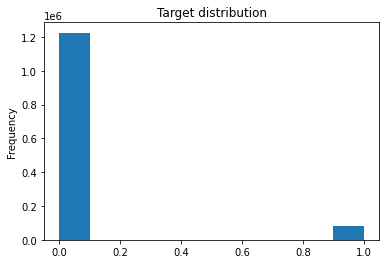

In [ ]:
df.target.plot(kind = 'hist' , title = "Target distribution")




## Task 4: Creating tf.data.Datasets for Training and Evaluation

In [ ]:
train_df , remaining = train_test_split(df, random_state = 42 , train_size = 0.0075 , stratify = df.target.values )
test_df , remaining = train_test_split(remaining, random_state = 42 , train_size = 0.00075 , stratify = remaining.target.values )

train_df.shape , test_df.shape

((9795, 3), (972, 3))

In [ ]:
# Creating input pipeline on CPU to use GPU efficiently 
AUTOTUNE = tf.data.AUTOTUNE
with tf.device('/cpu:0'):
  train_data = tf.data.Dataset.from_tensor_slices((train_df['question_text'].values , train_df['target'].values ))#.batch(32).prefetch(buffer_size=AUTOTUNE)
  test_data = tf.data.Dataset.from_tensor_slices((test_df['question_text'].values , test_df['target'].values ))#.batch(32).prefetch(buffer_size=AUTOTUNE)

  for text , label in train_data.take(1):
    print(text)
    print(label)

tf.Tensor(b'Why are unhealthy relationships so desirable?', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


## Task 5: Downloading a Pre-trained BERT Model from TensorFlow Hub

In [ ]:
"""
Each line of the dataset is composed of the review text and its label
- Data preprocessing consists of transforming text to BERT input features:
input_word_ids, input_mask, segment_ids
- In the process, tokenizing the text is done with the provided BERT model tokenizer
"""

label_list = [0 , 1] # Label categories
max_seq_length = 128 # maximum length of (token) input sequences . it can be any number
train_batch_size = 32 # batch size


# Get BERT layer and tokenizer:
# More details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4" , trainable = True)


vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file , do_lower_case)

In [ ]:
tokenizer.wordpiece_tokenizer.tokenize("hi, how are you doing?")

['hi', '##,', 'how', 'are', 'you', 'doing', '##?']

In [ ]:
tokenizer.convert_tokens_to_ids(tokenizer.wordpiece_tokenizer.tokenize("hi, how are you doing?"))

[7632, 29623, 2129, 2024, 2017, 2725, 29632]

## Task 6: Tokenizing and Preprocess Text for BERT

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1-SpKFELnEvBMBqO7h3iypo8q9uUUo96P' />
    <p style="text-align: center;color:gray">Figure 2: BERT Tokenizer</p>
</div>

We'll need to transform our data into a format BERT understands. This involves two steps. First, we create InputExamples using `classifier_data_lib`'s constructor `InputExample` provided in the BERT library.

In [ ]:
# This provides a function to convert row to input features and label ( as required by BERT)

def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):
  example = classifier_data_lib.InputExample(guid = None,
                                             text_a = text.numpy(),
                                             text_b = None,
                                             label = label.numpy())
  feature = classifier_data_lib.convert_single_example(0 , example , label_list , max_seq_length , tokenizer)
  
  return (feature.input_ids , feature.input_mask , feature.segment_ids , feature.label_id)
  

You want to use [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) to apply this function to each element of the dataset. [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) runs in graph mode.

- Graph tensors do not have a value.
- In graph mode you can only use TensorFlow Ops and functions.

So you can't `.map` this function directly: You need to wrap it in a [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function). The [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function) will pass regular tensors (with a value and a `.numpy()` method to access it), to the wrapped python function.

## Task 7: Wrap a Python Function into a TensorFlow op for Eager Execution

In [ ]:
def to_feature_map(text, label):
  input_ids , input_mask , segment_ids , label_id = tf.py_function(to_feature , inp = [text , label],
                                                                   Tout = [tf.int32 , tf.int32 , tf.int32 , tf.int32])
  
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([])

  x = {
      "input_word_ids": input_ids,
       "input_mask": input_mask,
       "input_type_ids": segment_ids
  }

  return(x,label_id)

## Task 8: Create a TensorFlow Input Pipeline with `tf.data`




In [ ]:
with tf.device('/cpu:0'):
  # train
  train_data = (train_data.map(to_feature_map,
                               num_parallel_calls = tf.data.experimental.AUTOTUNE)
  .shuffle(1000)
  .batch(32 , drop_remainder = True)
  .prefetch(tf.data.experimental.AUTOTUNE))

  # valid
  test_data = (test_data.map(to_feature_map,
                               num_parallel_calls = tf.data.experimental.AUTOTUNE)
  .shuffle(1000)
  .batch(32 , drop_remainder = True)
  .prefetch(tf.data.experimental.AUTOTUNE))

  

The resulting `tf.data.Datasets` return `(features, labels)` pairs, as expected by [`keras.Model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit):

In [ ]:
# train data spec
train_data.element_spec

({'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [ ]:
# valid data spec
test_data.element_spec

({'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [ ]:
train_data

<PrefetchDataset shapes: ({input_word_ids: (32, 128), input_mask: (32, 128), input_type_ids: (32, 128)}, (32,)), types: ({input_word_ids: tf.int32, input_mask: tf.int32, input_type_ids: tf.int32}, tf.int32)>

## Task 9: Add a Classification Head to the BERT Layer

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 3: BERT Layer</p>
</div>

In [ ]:
encoder_inputs = dict(
  input_word_ids=tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32),
  input_mask=tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32),
  input_type_ids=tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32),
)
encoder_inputs

{'input_mask': <KerasTensor: shape=(None, 128) dtype=int32 (created by layer 'input_26')>,
 'input_type_ids': <KerasTensor: shape=(None, 128) dtype=int32 (created by layer 'input_27')>,
 'input_word_ids': <KerasTensor: shape=(None, 128) dtype=int32 (created by layer 'input_25')>}

In [ ]:
encoder_inputs = dict(input_word_ids = input_word_ids ,input_mask = input_mask,input_type_ids = input_type_ids  )
encoder_inputs

{'input_mask': (<KerasTensor: shape=(None, 128) dtype=int32 (created by layer 'input_20')>,),
 'input_type_ids': (<KerasTensor: shape=(None, 128) dtype=int32 (created by layer 'input_21')>,),
 'input_word_ids': (<KerasTensor: shape=(None, 128) dtype=int32 (created by layer 'input_19')>,)}

In [ ]:
# Building the model
def create_model():
  input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                         name = "input_word_ids")
  input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                   name = "input_mask")
  input_type_ids=tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                       name = "input_type_ids")
  
  encoder_inputs = dict(input_word_ids = input_word_ids ,input_mask = input_mask,input_type_ids = input_type_ids  )
  bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4" , trainable = True)
  
  outputs  = bert_layer(encoder_inputs)
  pooled_output = outputs["pooled_output"]      
  
  drop = tf.keras.layers.Dropout(0.4)(pooled_output)
  output = tf.keras.layers.Dense(1, activation="sigmoid", name="output")(drop)

  model = tf.keras.Model(
      inputs={
      'input_word_ids': input_word_ids,
       'input_mask': input_mask,
       'input_type_ids': input_type_ids
  },
      outputs=output)
  return model


## Task 10: Fine-Tune BERT for Text Classification

In [ ]:
model = create_model()
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = tf.keras.metrics.BinaryAccuracy())
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_mask (InputLayer)         [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_type_ids (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_word_ids (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
keras_layer_3 (KerasLayer)      {'sequence_output':  109482241   input_mask[0][0]                 
                                                                 input_type_ids[0][0]         

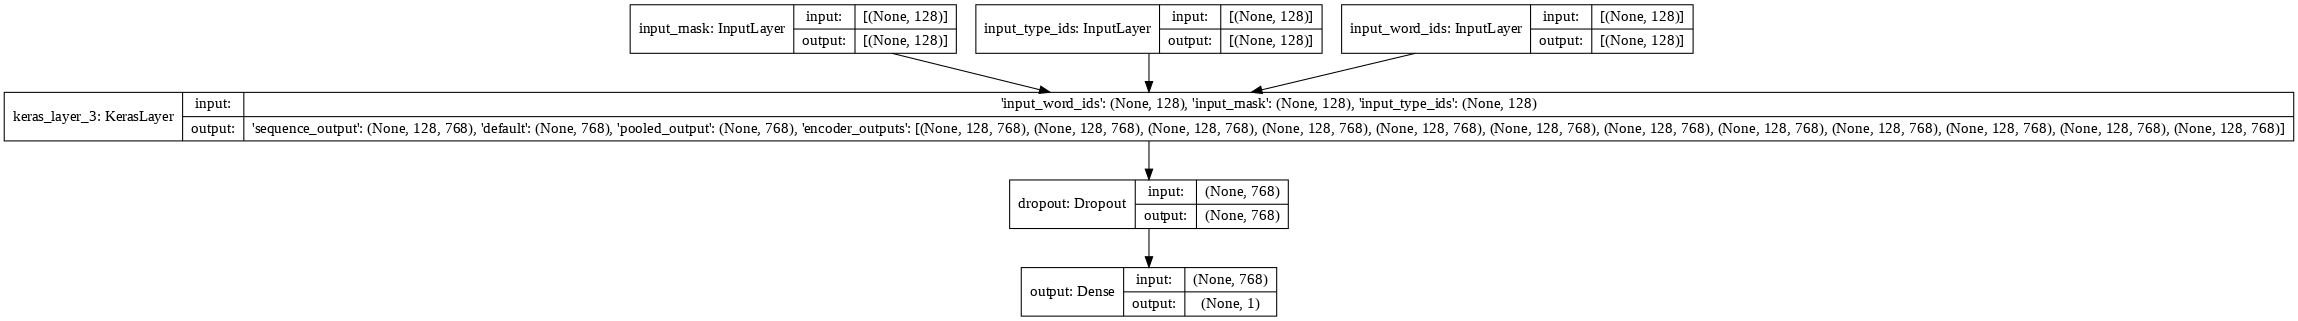

In [ ]:
tf.keras.utils.plot_model(model = model, show_shapes = True, dpi=76 )

In [ ]:
# Train model
epochs = 4
history = model.fit(train_data,
                    validation_data = test_data,
                    epochs = 2,
                    verbose = 1)

Epoch 1/2
306/306 [==============================] - 270s 834ms/step - loss: 0.1643 - binary_accuracy: 0.9405 - val_loss: 0.1244 - val_binary_accuracy: 0.9615
Epoch 2/2
306/306 [==============================] - 255s 831ms/step - loss: 0.1000 - binary_accuracy: 0.9614 - val_loss: 0.1463 - val_binary_accuracy: 0.9615


## Task 11: Evaluate the BERT Text Classification Model

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

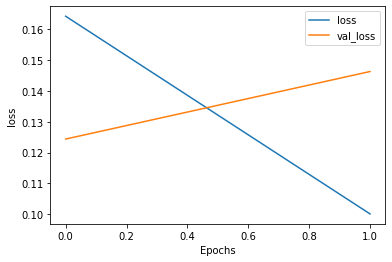

In [ ]:
plot_graphs(history,'loss')

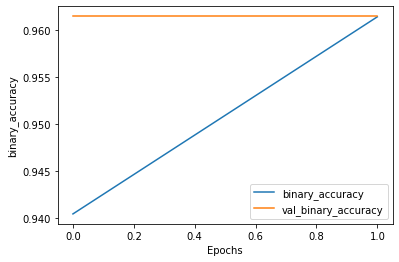

In [ ]:
plot_graphs(history,'binary_accuracy')

In [ ]:
# Evaluating on new data

example_list = ["Can you please share you mail ID?" , "why people hate most of black Americans?"]

valid_data = tf.data.Dataset.from_tensor_slices((example_list , [0,1]))
valid_data = (valid_data.map(to_feature_map).batch(1))
valid_data.element_spec

({'input_mask': TensorSpec(shape=(None, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(None, 128), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(None, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [ ]:
preds = model.predict(valid_data)

In [ ]:
threshold = 0.5
['Insincere' if pred >= threshold else 'Sincere' for pred in preds]

['Sincere', 'Insincere']

In [ ]:
model.save("BERT_Quora_model_2")

INFO:tensorflow:Assets written to: BERT_Quora_model_2/assets


INFO:tensorflow:Assets written to: BERT_Quora_model_2/assets


In [ ]:
ls BERT_Quora_model_2

assets/  keras_metadata.pb  saved_model.pb  variables/


In [ ]:
new_model = tf.keras.models.load_model("BERT_Quora_model_2")

In [ ]:
new_model.predict(valid_data)
threshold = 0.5
['Insincere' if pred >= threshold else 'Sincere' for pred in preds]

['Sincere', 'Insincere']